In [7]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [25]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal #here we are using random normal initialization
from keras.models import Sequential #Here we are importing sequential models
from keras.layers import Dense, Activation #Here we are importing dense layers and activation functions
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Flatten

In [49]:
def plt_dynamic(x,vy,ty,ax,colors = ['b']):#We will use this function to plot training loss and cross validation loss as a-
    # function of epoch
    #We are calling it a dynamic plot because as soon as each epoch is over, I want to update this plot
    ax.plot(x,vy,'b',label = 'Validation Loss')
    #x = number of epochs we want to run
    # vy = list of cross validation loss we got during each epoch
    # ty = list of training loss we got during each epoch
    # ax = labels for our x and y axis
    ax.plot(x,ty,'r',label = 'Train Loss')
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [11]:
df_train = pd.read_csv('fashion-mnist_train.csv')
df_test = pd.read_csv('fashion-mnist_test.csv')

In [15]:
df_train.shape

(60000, 785)

In [16]:
df_train.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
y_train = df_train['label']
y_test = df_test['label']

In [19]:
x_train = df_train.drop('label',axis = 1)
x_test = df_test.drop('label',axis = 1)

In [29]:
x_train = x_train.values
x_test = x_test.values

In [30]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [32]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,
         0,   0,   0,  62,  61,  21,  29,  23,  51, 136,  61,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  88, 201, 228, 225, 255, 115,  62, 137, 255, 235, 222,
       255, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  47, 252, 234, 238, 224, 215, 215, 229, 108, 180, 207,
       214, 224, 231, 249, 254,  45,   0,   0,   0,   0,   0,   0,   0,
         0,   1,   0,   0, 214, 222, 210, 213, 224, 225, 217, 22

In [33]:
x_train = x_train/255
x_test = x_test/255

In [34]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [35]:
#Now we will convert shape of each datapoint (image) in train and test from 28 x 28 to 1 x 784
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [36]:
x_train.shape

(60000, 28, 28, 1)

In [37]:
y_train[0]

2

In [39]:
#Above we can see that our class label is a number. So lets now convert our clas label into a 10 dimensional vector.
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs
y_train = np_utils.to_categorical(y_train,10) #converting each class label in train dataset into a 10 dim vector. Here I am using-
#- np_utils for one-hot encoding.
y_test = np_utils.to_categorical(y_test,10)

In [41]:
y_train[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [43]:
output_dim = 10 #indicates number of dimensions in output layer or number of ouputs coming out of output layer
input_dim = (x_train.shape[1],x_train.shape[2],x_train.shape[3]) #indicates number of dimensions in input layer or number of inputs coming into input layer
batch_size = 128
nb_epoch = 20

In [44]:
model = Sequential()
model.add(Conv2D(filters = 20,kernel_size = (5,5),border_mode = 'same',input_shape = input_dim,activation = 'relu',kernel_initializer='glorot_normal',kernel_regularizer='l1'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))

model.add(Conv2D(filters = 20,kernel_size = (5,5),border_mode = 'same',input_shape = input_dim,activation = 'relu',kernel_initializer='glorot_normal',kernel_regularizer='l1'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))

model.add(Flatten())
model.add(Dense(500,activation = 'relu',kernel_initializer='glorot_normal'))

model.add(Dense(output_dim,activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 20)        10020     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 20)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 980)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               490500    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
Total para

In [45]:
#defining the optimizer, loss function and metric
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [47]:
history = model.fit(x_train,y_train,batch_size = batch_size,epochs = nb_epoch,verbose = 1,validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 28s 473us/step - loss: 1.1353 - acc: 0.7750 - val_loss: 0.6341 - val_acc: 0.8377
Epoch 2/20
60000/60000 [==============================] - 26s 438us/step - loss: 0.5837 - acc: 0.8391 - val_loss: 0.5270 - val_acc: 0.8562
Epoch 3/20
60000/60000 [==============================] - 26s 427us/step - loss: 0.5190 - acc: 0.8559 - val_loss: 0.4880 - val_acc: 0.8644
Epoch 4/20
60000/60000 [==============================] - 27s 447us/step - loss: 0.4792 - acc: 0.8652 - val_loss: 0.4611 - val_acc: 0.8693
Epoch 5/20
60000/60000 [==============================] - 27s 453us/step - loss: 0.4541 - acc: 0.8716 - val_loss: 0.4329 - val_acc: 0.8799
Epoch 6/20
60000/60000 [==============================] - 28s 464us/step - loss: 0.4329 - acc: 0.8781 - val_loss: 0.4253 - val_acc: 0.8807
Epoch 7/20
60000/60000 [==============================] - 26s 434us/step - loss: 0.4177 - acc: 0.8832 - val_loss: 0.

10000/10000 [==============================] - 3s 266us/step
Test loss 0.3402430163383484
Test accuracy 0.905


<IPython.core.display.Javascript object>


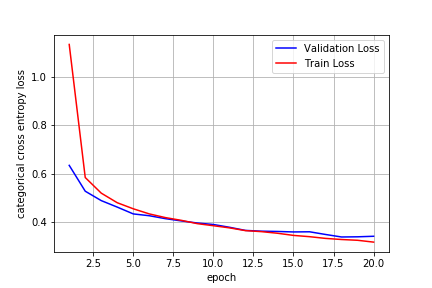

In [50]:
score = model.evaluate(x_test,y_test)
print('Test loss',score[0])
print('Test accuracy',score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');ax.set_ylabel('categorical cross entropy loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x,vy,ty,ax)